In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Sessile Biomass

In [3]:
import pandas as pd
import os

base_dir = 'scan_results/'  # current directory
all_runs = []

for folder_name in os.listdir(base_dir):
    if folder_name == 'base_': 
        continue
    folder_path = os.path.join(base_dir, folder_name)
    if os.path.isdir(folder_path):
        m_file = os.path.join(folder_path, 'Mtot_fraction.dat')
        eps_file = os.path.join(folder_path, 'EPS_fraction.dat')
        auto_file = os.path.join(folder_path, 'autoinducer.dat')
        if os.path.exists(m_file) and os.path.exists(eps_file):
            m_df = pd.read_csv(m_file, sep=r'\s+', header=None, names=['time', 'M'])
            eps_df = pd.read_csv(eps_file, sep=r'\s+', header=None, names=['time', 'EPS'])
            a_df = pd.read_csv(auto_file, sep=r'\s+', header=None, names=['time', 'A'])
            
            df = m_df.merge(eps_df, on='time')
            df = df.merge(a_df, on='time')
            df = df.rename(columns={'M': f'M_{folder_name}', 'EPS': f'EPS_{folder_name}', 'A': f'A_{folder_name}'})
            all_runs.append(df.set_index('time'))

combined_df = pd.concat(all_runs, axis=1)
df = combined_df.reset_index()  # time becomes a column again

print(df.head())


    time  M_E_crit_0.1  EPS_E_crit_0.1  A_E_crit_0.1  M_E_crit_0.5  \
0      0      0.000750        0.000250      0.000000      0.000750   
1   5000      0.000859        0.000268      0.300141      0.000843   
2  10000      0.000981        0.000286      0.356102      0.000941   
3  15000      0.001117        0.000305      0.406402      0.001047   
4  20000      0.001269        0.000326      0.462219      0.001160   

   EPS_E_crit_0.5  A_E_crit_0.5  M_E_crit_0.4  EPS_E_crit_0.4  A_E_crit_0.4  \
0        0.001250      0.000000      0.000750        0.001000      0.000000   
1        0.001253      0.296144      0.000847        0.001007      0.297107   
2        0.001248      0.343982      0.000950        0.001007      0.346881   
3        0.001237      0.383773      0.001065        0.001004      0.389547   
4        0.001223      0.426057      0.001191        0.000999      0.435995   

   M_E_crit_0.2  EPS_E_crit_0.2  A_E_crit_0.2  M_E_crit_0.6  EPS_E_crit_0.6  \
0      0.000750        0.

## EPS

## Merge

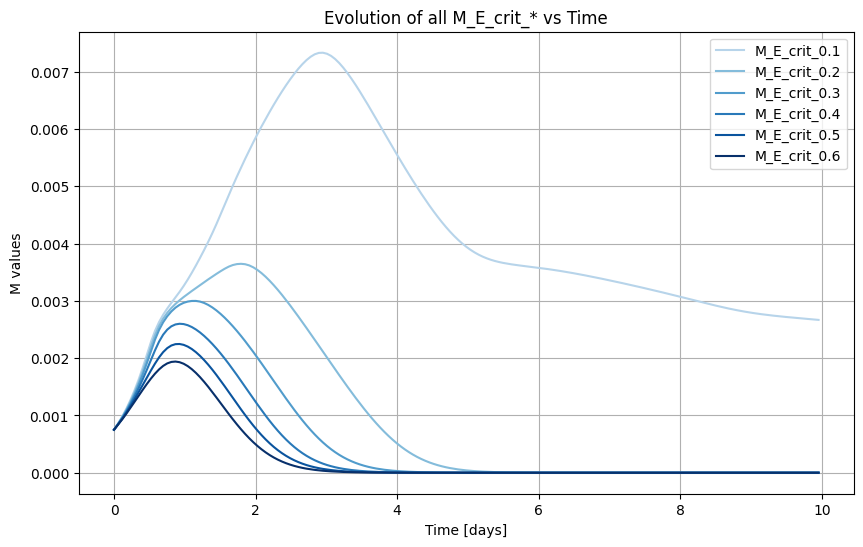

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example: if your data is in a CSV file
# df = pd.read_csv("your_file.csv")

# Assuming you already have your dataframe as df
m_columns = [col for col in df.columns if col.startswith("M_")]
m_columns.sort()

# Generate colors from a colormap
cmap = plt.cm.Blues  # You can try 'viridis', 'plasma', etc.
colors = cmap(np.linspace(0.3, 1, len(m_columns)))  
# 0.3 to 1 avoids too-light shades

plt.figure(figsize=(10,6))
for col, color in zip(m_columns, colors):
    plt.plot(df["time"]/86400, df[col], label=col, color=color)

plt.xlabel("Time [days]")
plt.ylabel("M values")
plt.title("Evolution of all M_E_crit_* vs Time")
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'ax2' is not defined

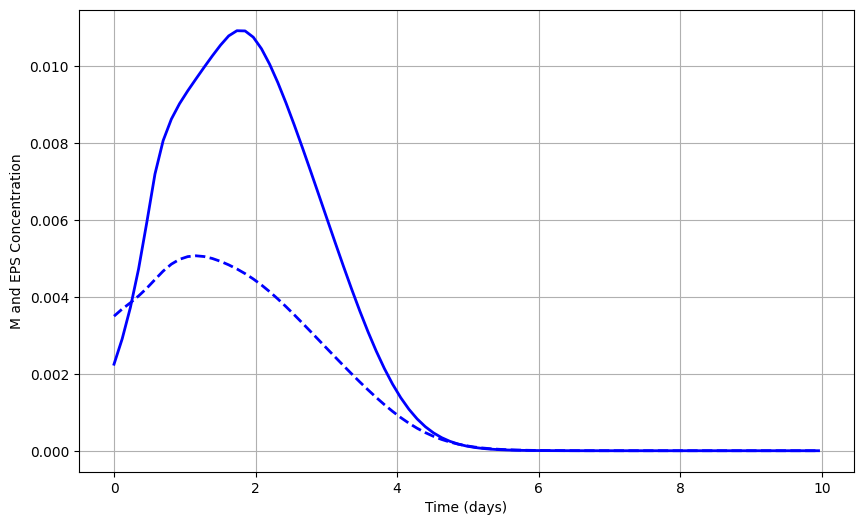

In [5]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

# Left axis: M and EPS
ax1.plot(df['time_days'], df['M_base']*3, label='M 10', color='blue', linewidth=2)
# ax1.plot(df['time_days'], df['M_enzyme_autoinducer_10'], label='M 10E', color='red', linewidth=2)


ax1.plot(df['time_days'], df['EPS_base']*7, label='EPS 10', color='blue', linewidth=2, linestyle='--')
# ax1.plot(df['time_days'], df['EPS_enzyme_autoinducer_10'], label='EPS 10E', color='red', linewidth=2, linestyle='--')

ax1.set_xlabel('Time (days)')
ax1.set_ylabel('M and EPS Concentration')
ax1.grid(True)

# # Right axis: Autoinducer A
# ax2 = ax1.twinx()
# ax2.plot(df['time_days'], df['A_base_autoinducer_10'], label='A 10', color='green', linewidth=2)
# ax2.plot(df['time_days'], df['A_enzyme_autoinducer_10'], label='A 10E', color='orange', linewidth=2)
# ax2.set_ylabel('Autoinducer (A)')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('M, EPS, and Autoinducer over Time under Different Conditions')
plt.tight_layout()
plt.show()


NameError: name 'ax2' is not defined

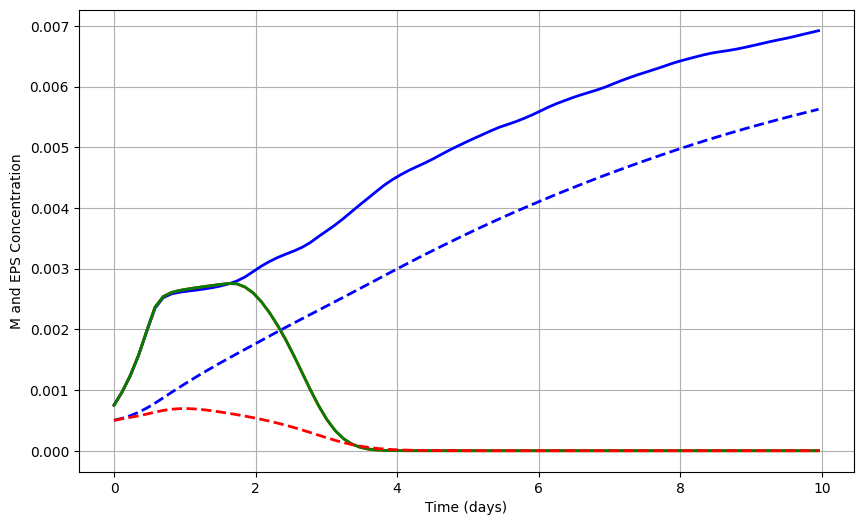

In [7]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

# Left axis: M and EPS
ax1.plot(df['time_days'], df['M_base_autoinducer_40'], label='M 40', color='blue', linewidth=2)
ax1.plot(df['time_days'], df['M_enzyme_autoinducer_40'], label='M 40E', color='red', linewidth=2)
ax1.plot(df['time_days'], df['M_enzyme_autoinducer_60'], label='M 60E', color='green', linewidth=2)


ax1.plot(df['time_days'], df['EPS_base_autoinducer_40'], label='EPS 40', color='blue', linewidth=2, linestyle='--')
ax1.plot(df['time_days'], df['EPS_enzyme_autoinducer_40'], label='EPS 40E', color='red', linewidth=2, linestyle='--')

ax1.set_xlabel('Time (days)')
ax1.set_ylabel('M and EPS Concentration')
ax1.grid(True)

# Right axis: Autoinducer A
# ax2 = ax1.twinx()
# ax2.plot(df['time_days'], df['A_base_autoinducer_40'], label='A 40', color='green', linewidth=2)
# ax2.plot(df['time_days'], df['A_enzyme_autoinducer_40'], label='A 40E', color='orange', linewidth=2)
# ax2.set_ylabel('Autoinducer (A)')

# Combine legends from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title('M, EPS, and Autoinducer over Time under Different Conditions')
plt.tight_layout()
plt.show()


In [26]:

biomass_df = pd.read_csv('biomass_0.dat', 
                 sep=r'\s+',   
                 header=None, 
                 names=['time', 'B']) 

print(biomass_df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'biomass_0.dat'

In [ ]:
plt.plot(biomass_df["time"] / (60*60*24), biomass_df["B"])
plt.xlabel("Days")
plt.ylabel("B")
plt.show()
